In [207]:
import numpy as np
import pandas as pd
from collections import defaultdict 
import random
import math
import matplotlib 
import matplotlib.pyplot as plt
pd.set_option('max_columns', None)

import collections
compare = lambda x, y: collections.Counter(x) == collections.Counter(y)

In [80]:
df_food = pd.read_csv('data/food_data.csv')
cols = [4, 8, 9]
df_food.drop(columns = df_food.columns[cols], axis=1, inplace=True)
#df_food.sort_values(by=df_food.columns[2])
df_food[df_food.columns[2:]] = df_food[df_food.columns[2:]] * 100


#Correct data
cols=['Calcium (g)', 'Phosphorus (g)','Potassium (g)','Sodium (g)']
df_food[cols] = df_food[cols] / 100

cols=['Calcium (g)', 'Phosphorus (g)','Potassium (g)','Sodium (g)']
df_food[cols] = df_food[cols] / 10

df_food

name emoji  Calories (kcal)  Carbohydrates (g)  Protein (g)  \
0          grapes     🍇             69.0              18.10         0.72   
1           melon     🍈             28.0               6.58         1.11   
2      watermelon     🍉             30.0               7.55         0.61   
3       tangerine     🍊             53.0              13.34         0.81   
4           lemon     🍋             29.0               9.32         1.10   
5          banana     🍌             89.0              22.84         1.09   
6       pineapple     🍍             50.0              13.12         0.54   
7       red apple     🍎             63.0              15.22         0.20   
8     green apple     🍏             58.0              13.61         0.44   
9            pear     🍐             57.0              15.23         0.36   
10          peach     🍑             39.0               9.54         0.91   
11       cherries     🍒             63.0              16.01         1.06   
12     strawberry     🍓             32.0               7.68         0.67   
13      kiwifruit     🥝             61.0              14.66         1.14   
14         tomato     🍅             18.0               3.89         0.88   
15        avocado     🥑            160.0               8.53         2.00   
16       eggplant     🍆             25.0               5.88         0.98   
17         potato     🥔             90.0              20.71         2.01   
18         carrot     🥕             41.0               9.58         0.93   
19           corn     🌽             96.0              20.98         3.41   
20     hot pepper     🌶             40.0               8.81         1.87   
21       cucumber     🥒             15.0               3.63         0.65   
22       mushroom     🍄             22.0               3.26         3.09   
23        peanuts     🥜            567.0              16.13        25.80   
24       chestnut     🌰            196.0              44.17         1.63   
25          bread     🍞            274.0              47.54        10.67   
26      croissant     🥐            406.0              45.80         8.20   
27   french bread     🥖            272.0              51.88        10.75   
28       pancakes     🥞            227.0              28.30         6.40   
29         cheese     🧀            393.0               1.44        26.96   
30           beef     🍖            217.0               0.00        27.48   
31        chicken     🍗            184.0               0.00        24.03   
32          bacon     🥓            898.0               0.00         0.07   
33      hamburger     🍔            254.0              24.81        11.74   
34   french fries     🍟            312.0              41.44         3.43   
35          pizza     🍕            266.0              33.33        11.39   
36         hotdog     🌭            247.0              18.40        10.60   
37           taco     🌮            226.0              19.85         8.86   
38        burrito     🌯            180.0              23.37         7.03   
39        popcorn     🍿            500.0              57.20         9.00   
40  rice crackers     🍘            416.0              82.64        10.00   
41           rice     🍚            130.0              28.59         2.38   
42      spaghetti     🍝            157.0              30.59         5.80   
43   fried shrimp     🍤            308.0              27.99         7.84   
44      ice cream     🍨            222.0              22.20         4.10   
45       doughnut     🍩            417.0              57.40         4.50   
46         cookie     🍪            497.0              66.10         4.60   
47           cake     🍰            371.0              53.40         5.30   
48  chocolate bar     🍫            518.0              64.59         6.51   
49          candy     🍬            394.0              98.00         0.00   
50   custard flan     🍮            145.0              22.78         4.53   
51          honey     🍯            304.0              82.40  

In [93]:
min_rdi = pd.read_csv('data/min_rdi.csv')
min_rdi.head()

Calories (kcal)  Carbohydrates (g)  Protein (g)  Total Fat (g)  \
0             2000                250           85             65   

   Saturated Fat (g)  Total Fiber (g)  Cholesterol (mg)  Vitamin B6 (mg)  \
0                 20               28               300              1.3   

   Vitamin A (IU)  Vitamin B12 (ug)  Vitamin C (mg)  Vitamin D (IU)  \
0            3000               2.4              90             600   

   Vitamin E (IU)  Vitamin K (ug)  Thiamin (mg)  Riboflavin (mg)  Niacin (mg)  \
0              20             120           1.2              1.3           16   

   Folate (ug)  Pantothenic Acid (mg)  Choline (mg)  Calcium (g)  Copper (mg)  \
0          400                      5           550            1          0.9   

   Iron (mg)  Magnesium (mg)  Manganese (mg)  Phosphorus (g)  Potassium (g)  \
0          8             420             2.3             0.7            3.5   

   Selenium (ug)  Sodium (g)  Zinc (mg)  
0             55         1.5         11

In [174]:
prod_list = ['cheese', 'rice', 'chicken', 'potato', 'carrot', 'chocolate bar', 'bread']
products = df_food[df_food['name'].isin(prod_list)]
np_products = products.to_numpy()

products.head(25)

name emoji  Calories (kcal)  Carbohydrates (g)  Protein (g)  \
17         potato     🥔             90.0              20.71         2.01   
18         carrot     🥕             41.0               9.58         0.93   
25          bread     🍞            274.0              47.54        10.67   
29         cheese     🧀            393.0               1.44        26.96   
31        chicken     🍗            184.0               0.00        24.03   
41           rice     🍚            130.0              28.59         2.38   
48  chocolate bar     🍫            518.0              64.59         6.51   

    Total Fat (g)  Saturated Fat (g)  Total Fiber (g)  Cholesterol (mg)  \
17           0.15              0.052              3.3               0.0   
18           0.24              0.037              2.8               0.0   
25           4.53              0.697              4.0               0.0   
29          30.99             18.227              0.0              93.0   
31           8.99              2.446              0.0             127.0   
41           0.21              0.057              0.3               0.0   
48          25.99             17.953              1.0              11.0   

    Vitamin B6 (mg)  Vitamin A (IU)  Vitamin B12 (ug)  Vitamin C (mg)  \
17            0.286         19218.0              0.00            19.6   
18            0.138         16706.0              0.00             5.9   
25            0.111             2.0              0.00             0.2   
29            0.071          1047.0              3.06             0.0   
31            0.413            68.0              0.38             0.0   
41            0.050             0.0              0.00             0.0   
48            0.020            81.0              0.56             0.0   

    Vitamin D (IU)  Vitamin E (IU)  Vitamin K (ug)  Thiamin (mg)  \
17             0.0            0.71             2.3         0.107   
18             0.0            0.66            13.2         0.066   
25             0.0            0.19             4.9         0.411   
29             0.0            0.60             1.4         0.011   
31             4.0            0.19             3.9         0.090   
41             0.0            0.00             0.0         0.167   
48             0.0            0.34             5.2         0.117   

    Riboflavin (mg)  Niacin (mg)  Folate (ug)  Pantothenic Acid (mg)  \
17            0.106        1.487          6.0                  0.884   
18            0.058        0.983         19.0                  0.273   
25            0.252        5.590         85.0                  0.820   
29            0.302        0.064         10.0                  0.353   
31            0.187        6.034          5.0                  1.191   
41            0.016        1.835         58.0                  0.411   
48            0.210        0.500         14.0                  0.640   

    Choline (mg)  Calcium (g)  Copper (mg)  Iron (mg)  Magnesium (mg)  \
17          13.1        0.038        0.161       0.69            27.0   
18           8.8        0.033        0.045       0.30            12.0   
25          18.7        0.125        0.148       3.60            41.0   
29          15.5        0.890        0.047       0.13            33.0   
31          70.0        0.012        0.061       1.09            23.0   
41           0.0        0.003        0.038       1.49            13.0   
48          31.0        0.125        0.220       1.00            37.0   

    Manganese (mg)  Phosphorus (g)  Potassium (g)  Selenium (ug)  Sodium (g)  \
17           0.497           0.054          0.475            0.2       0.036   
18           0.143           0.035          0.320            0.1       0.069   
25           1.026           0.129          0.141           28.8       0.473   
29           0.026           0.574          0.072           30.0       0.187   
31           0.020           0.202          0.264           25.7       0.098   
41           0.377           0.

In [188]:
class Branch:
    def __init__(self):
        self.nutritions = np.zeros(30)
        self.calories = 0
        self.history = []
        self.used = False
        self.fitness = 0
        self.entropy = 0

In [190]:
branches = []
branches.append(Branch())
print(branches[0].history)
print(branches[0].nutritions)

[]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]


In [191]:
drop_factor = 0.2
searched = []
new_branches = []
current_branches = []
current_branches.append(Branch())

i = 0

finished = False


while not finished:
    i +=1
    print(i)
    #print (all(nb.nutritions[2] < min_rdi.loc(0)[0][0] * 0.1  for nb in new_branches))
    new_branches = []
    for n in range(len(current_branches)):
        for j in range(len(np_products)):
            history_copy = current_branches[n].history.copy()
            history_copy.append(np_products[j][0])
            # if this combination of food doesn't exists
            # and this combination doesn't leads to 120% RDI of calories
            # and random drop factor (to speed up work)
            if (not any(compare(history_copy, item.history) for item in new_branches) 
                and (np_products[j][2] + current_branches[n].calories < min_rdi.loc(0)[0][0] * 1.2)
                and random.random() > drop_factor):
                new_branch = Branch()
                new_branch.calories = current_branches[n].calories + np_products[j][2]
                new_branch.history = current_branches[n].history.copy()
                new_branch.history.append(np_products[j][0])
                new_branches.append(new_branch)
                
    finished = not (any(len(nb.history) < 6 for nb in new_branches))
                
    searched.extend(current_branches)
    current_branches = new_branches
       
    
    
searched.extend(new_branches)

print('END')

1
2
3
4
5
6
END


In [192]:
branches = [s for s in searched if (min_rdi.loc(0)[0][0] * 0.8
                             < s.calories
                             < min_rdi.loc(0)[0][0] * 1.2)]

branches = branches.copy()
for b in branches:
    for h in b.history:
        b.nutritions = b.nutritions + df_food[df_food['name'] == h].to_numpy()[0,2:]

In [193]:
len(branches)

328

In [194]:
def normalize(b):
    b.nutritions = b.nutritions.copy() / min_rdi.loc(0)[0]
    return b

In [181]:
branches = list(map(normalize, branches))

In [195]:
entropy_coef = 1
eps = 0.01

for b in branches:
    val_sum = sum(collections.Counter(b.history).values())
    b.entropy = - sum([i / val_sum * math.log(i / val_sum, 2) 
                     for i in list(collections.Counter(b.history).values())])
    
    #fitness = 1 / SUM(SE) * entropy
    fit = 1 / (sum([min(s, 0) ** 2 for s in b.nutritions - 1]) + eps)
    b.fitness = fit - fit * (1 - b.entropy) * entropy_coef

In [196]:
branches.sort(key = lambda b: b.fitness, reverse = True)

In [197]:
print('BEST DIETS')
for i in range(min(10, len(branches))):
    print(branches[i].history)
    print(branches[i].fitness)
    print(branches[i].entropy)
    print('---------------------------')

BEST DIETS
['potato', 'bread', 'chicken', 'cheese', 'bread', 'chocolate bar']
40.046761536466356
2.2516291673878226
---------------------------
['potato', 'bread', 'chicken', 'chocolate bar', 'chocolate bar', 'cheese']
33.159494681940764
2.251629167387823
---------------------------
['potato', 'bread', 'chicken', 'cheese', 'chicken', 'chocolate bar']
16.75369183151152
2.2516291673878226
---------------------------
['bread', 'cheese', 'chicken', 'carrot', 'chocolate bar', 'bread']
16.30941688858821
2.2516291673878226
---------------------------
['bread', 'cheese', 'chicken', 'carrot', 'chocolate bar', 'chocolate bar']
13.38828966391656
2.2516291673878226
---------------------------
['potato', 'bread', 'chicken', 'cheese', 'cheese', 'chocolate bar']
12.892310676773542
2.251629167387823
---------------------------
['potato', 'bread', 'chicken', 'cheese', 'bread', 'cheese']
11.94872330360829
1.9182958340544896
---------------------------
['bread', 'chicken', 'bread', 'bread', 'bread', 'che

In [198]:
print('WORST DIETS')
for i in range(min(10, len(branches)), -1, -1):
    print(branches[i].history)
    print(branches[i].fitness)
    print(branches[i].entropy)
    print('---------------------------')

WORST DIETS
['bread', 'cheese', 'cheese', 'carrot', 'chocolate bar', 'chicken']
7.16997149176471
2.2516291673878226
---------------------------
['bread', 'cheese', 'chicken', 'bread', 'bread', 'chocolate bar']
7.208765831743749
1.7924812503605778
---------------------------
['potato', 'bread', 'chicken', 'chocolate bar', 'bread', 'chocolate bar']
7.309436536419575
1.9182958340544896
---------------------------
['bread', 'chicken', 'bread', 'bread', 'bread', 'cheese']
8.065452413830185
1.2516291673878228
---------------------------
['potato', 'bread', 'chicken', 'cheese', 'bread', 'cheese']
11.94872330360829
1.9182958340544896
---------------------------
['potato', 'bread', 'chicken', 'cheese', 'cheese', 'chocolate bar']
12.892310676773542
2.251629167387823
---------------------------
['bread', 'cheese', 'chicken', 'carrot', 'chocolate bar', 'chocolate bar']
13.38828966391656
2.2516291673878226
---------------------------
['bread', 'cheese', 'chicken', 'carrot', 'chocolate bar', 'bread'

In [199]:
i = 0
print(branches[i].history)
print(branches[i].fitness)
print(branches[i].nutritions)
print(collections.Counter(branches[i].history))

['potato', 'bread', 'chicken', 'cheese', 'bread', 'chocolate bar']
40.046761536466356
[1733.0 181.82 80.85000000000001 75.18 40.072 12.3 231.0 1.012 20418.0 4.0
 20.0 4.0 2.2199999999999998 22.599999999999998 1.147 1.309 19.265 205.0
 4.708 167.0 1.315 0.7849999999999999 10.11 202.0 2.695 1.223 1.324
 118.49999999999999 1.3210000000000002 8.93]
Counter({'bread': 2, 'potato': 1, 'chicken': 1, 'cheese': 1, 'chocolate bar': 1})


In [187]:
i = -1
print(branches[i].history)
print(branches[i].fitness)
print(branches[i].nutritions)
print(collections.Counter(branches[i].history))

['cheese', 'cheese', 'cheese', 'cheese', 'cheese', 'cheese']
0.0
Calories (kcal)             1.179
Carbohydrates (g)         0.03456
Protein (g)              1.903059
Total Fat (g)            2.860615
Saturated Fat (g)          5.4681
Total Fiber (g)               0.0
Cholesterol (mg)             1.86
Vitamin B6 (mg)          0.327692
Vitamin A (IU)              2.094
Vitamin B12 (ug)             7.65
Vitamin C (mg)                0.0
Vitamin D (IU)                0.0
Vitamin E (IU)               0.18
Vitamin K (ug)               0.07
Thiamin (mg)                0.055
Riboflavin (mg)          1.393846
Niacin (mg)                 0.024
Folate (ug)                  0.15
Pantothenic Acid (mg)      0.4236
Choline (mg)             0.169091
Calcium (g)                  5.34
Copper (mg)              0.313333
Iron (mg)                  0.0975
Magnesium (mg)           0.471429
Manganese (mg)           0.067826
Phosphorus (g)               4.92
Potassium (g)            0.123429
Selenium (ug)    

In [30]:
b.nutritions

Calories (kcal)             1.179
Carbohydrates (g)         0.03456
Protein (g)              1.903059
Total Fat (g)            2.860615
Saturated Fat (g)          5.4681
Total Fiber (g)               0.0
Cholesterol (mg)             1.86
Vitamin B6 (mg)          0.327692
Vitamin A (IU)              2.094
Vitamin B12 (ug)             7.65
Vitamin C (mg)                0.0
Vitamin D (IU)                0.0
Vitamin E (IU)               0.18
Vitamin K (ug)               0.07
Thiamin (mg)                0.055
Riboflavin (mg)          1.393846
Niacin (mg)                 0.024
Folate (ug)                  0.15
Pantothenic Acid (mg)      0.4236
Choline (mg)             0.169091
Calcium (g)                  53.4
Copper (mg)              0.313333
Iron (mg)                  0.0975
Magnesium (mg)           0.471429
Manganese (mg)           0.067826
Phosphorus (g)               4.92
Potassium (g)            0.123429
Selenium (ug)            3.272727
Sodium (g)                  0.748
Zinc (mg)     

<BarContainer object of 59 artists>

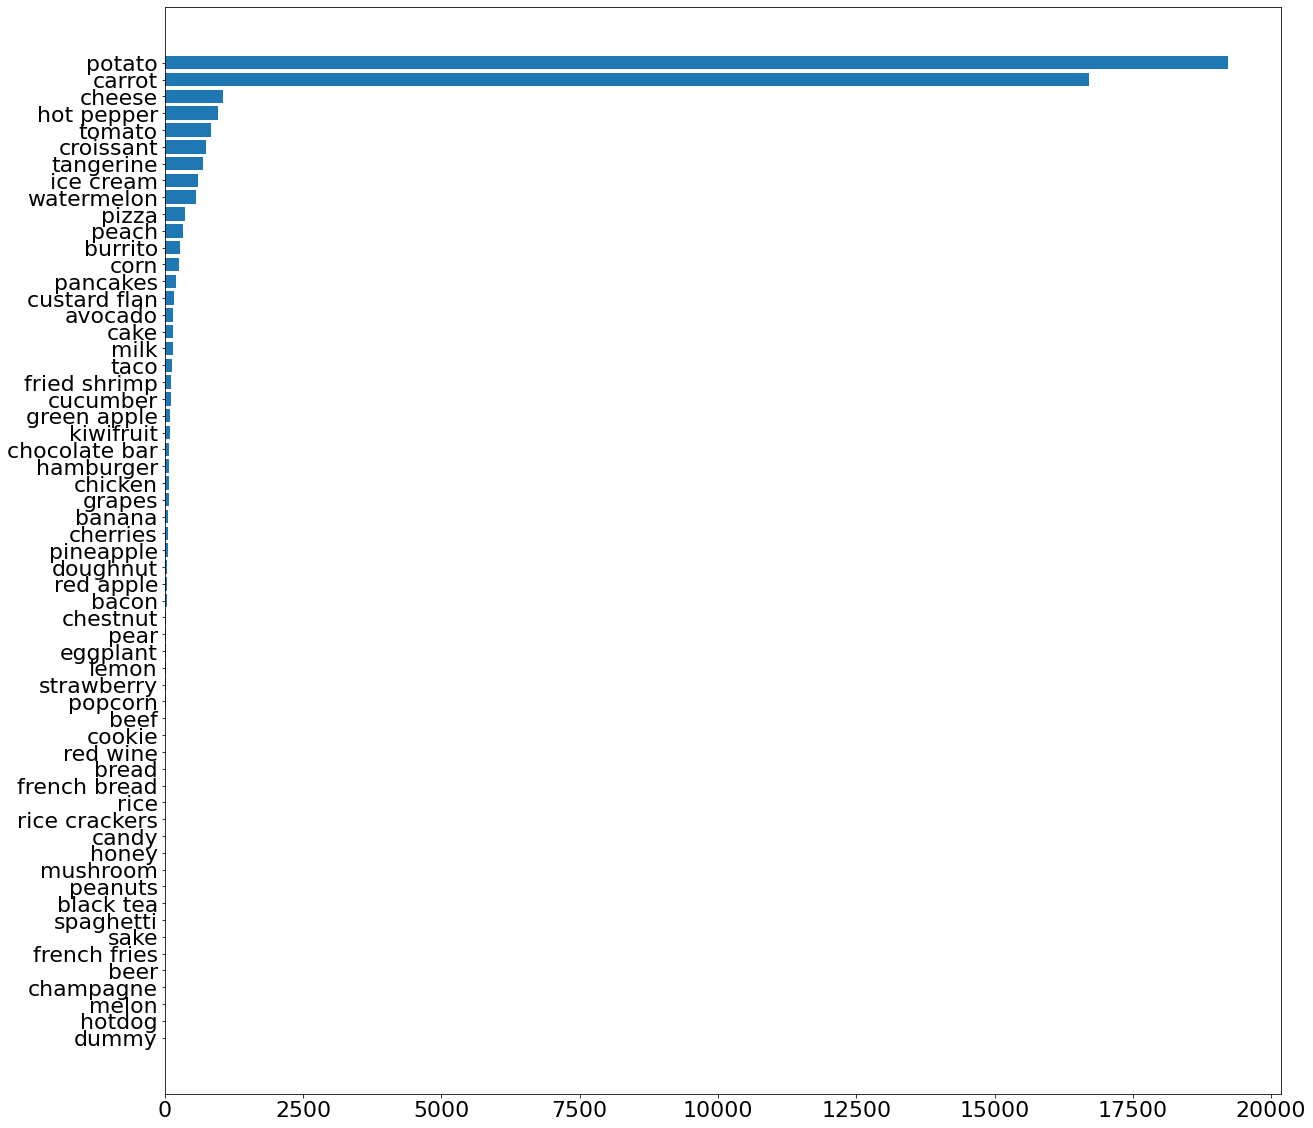

In [232]:
matplotlib.rc('xtick', labelsize=22) 
matplotlib.rc('ytick', labelsize=22)

plt.figure(figsize=(20,20))

df_food = df_food.sort_values(by = 'Vitamin A (IU)')
plt.barh( df_food['name'], df_food['Vitamin A (IU)'])

In [235]:
plt

<module 'matplotlib.pyplot' from 'c:\\users\\andrii\\appdata\\local\\programs\\python\\python39\\lib\\site-packages\\matplotlib\\pyplot.py'>